In [ ]:
#Edgar Moises Hernandez-Gonzalez
#08/07/19
#clasificar EEG de habla imaginada con CNN
#1 capa de 32@3x33

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072].values
y = datos.iloc[:, 3072].values

num_classes = 6
n_samples = len(y)
print(x.shape)
print(y.shape)
print(n_samples)

(132, 3072)
(132,)
132


In [3]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [4]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 6, 512, 1))
print(x.shape)

(132, 6, 512, 1)


In [5]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 33), activation='relu', input_shape=(6, 512, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 4, 480, 32)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 240, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 15360)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                983104    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 986,694
Trainable params: 986,694
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 99, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 3s 35ms/sample - loss: 1.8264 - acc: 0.1616 - val_loss: 3.7495 - val_acc: 0.1212
Epoch 2/20
99/99 [==============================] - 0s 390us/sample - loss: 2.8309 - acc: 0.2525 - val_loss: 4.0020 - val_acc: 0.1515
Epoch 3/20
99/99 [==============================] - 0s 379us/sample - loss: 3.1046 - acc: 0.1919 - val_loss: 2.7084 - val_acc: 0.1515
Epoch 4/20
99/99 [==============================] - 0s 386us/sample - loss: 1.9472 - acc: 0.3232 - val_loss: 2.3191 - val_acc: 0.2121
Epoch 5/20
99/99 [==============================] - 0s 404us/sample - loss: 1.6526 - acc: 0.3434 - val_loss: 1.9679 - val_acc: 0.1515
Epoch 6/20
99/99 [==============================] - 0s 406us/sample - loss: 1.5133 - acc: 0.4343 - val_loss: 1.9742 - val_acc: 0.2121
Epoch 7/20
99/99 [==============================] - 0s 376us/sample - loss: 1.4815 - acc: 0.3838 - val_loss: 2.0139 - val_acc: 0.1818
Epoch 8/20
99/99 [=

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 739us/sample - loss: 2.0987 - acc: 0.1212
Test loss: 2.0986858389594336
Test accuracy: 0.121212125


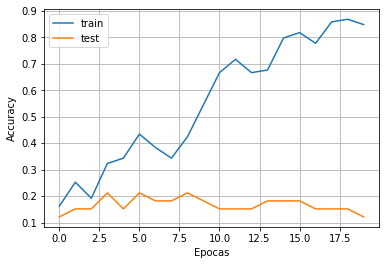

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

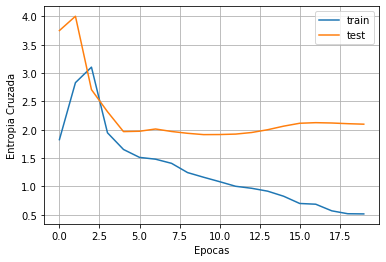

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()